In [1]:
library(Boruta)
library(stringr)

Loading required package: ranger


In [4]:
data <- read.csv('../data/amelia_data.csv', sep='\t')

head(data)

timestamp,VAL_23.FT.92512.X.Value.average,VAL_23.FT.92521.X.Value.average,VAL_23.FT.92537.01.X.Value.average,VAL_23.FT.96151.X.Value.average,VAL_23.FT.96152.X.Value.average,VAL_23.FT.96158.X.Value.average,VAL_23.FT.96159.X.Value.average,VAL_23.KA.9101.M01.62B.X.Value.average,VAL_23.KA.9101_APE.VALUE.average,⋯,VAL_45.PDT.92506.X.Value.average,VAL_45.PDT.92606.X.Value.average,VAL_45.PT.92508.X.Value.average,VAL_45.PT.92608.X.Value.average,VAL_45.PT.92609.X.Value.average,VAL_45.TT.92506.X.Value.average,VAL_45.TT.92508.X.Value.average,VAL_45.TT.92606.X.Value.average,VAL_45.TT.92607A.X.Value.average,VAL_45.TT.92607B.X.Value.average
1.514765e+12,86513.12,4.401998,161173.2,17.38066,27.70608,18.39865,19.40636,9141.690,85.09909,⋯,0.5493244,0.4843041,2.275901,3.702201,3.726124,16.27771,46.15202,16.82067,108.5209,60.94572
1.514765e+12,95862.07,4.456219,164465.8,17.39795,27.79270,18.39151,19.42285,9252.934,83.62878,⋯,0.5509349,0.4832682,2.273809,3.685665,3.711056,16.27945,46.14248,16.76080,108.5977,60.81935
1.514765e+12,96191.59,4.505277,166973.2,17.40821,27.78446,18.38340,19.41854,9404.077,83.79804,⋯,0.5502207,0.4796795,2.273511,3.679600,3.704178,16.28329,46.09172,16.80574,108.7205,60.75282
1.514765e+12,91128.62,4.499127,164402.7,17.42042,27.78758,18.41191,19.42989,9264.223,83.78863,⋯,0.5509333,0.4816260,2.273505,3.666550,3.693027,16.28191,46.12929,16.86113,108.9298,60.78318
1.514765e+12,91532.35,4.507830,164649.2,17.39303,27.71386,18.39100,19.39947,9310.935,84.02951,⋯,0.5513894,0.4820547,2.276424,3.714492,3.740088,16.27711,46.24554,16.83897,109.0733,60.85556
1.514765e+12,88252.00,4.523839,164766.4,17.41381,27.74474,18.39843,19.41493,9275.117,83.54444,⋯,0.5508509,0.4865489,2.275578,3.707182,3.732400,16.29041,46.33954,16.85636,109.1350,60.95016


In [5]:
percentage_na <- round(sum(is.na(data)) / nrow(data),2)
cat(str_glue('Percentage NAs: {percentage_na}%'), '\n')
cat(str_glue('Number of rows in data: {nrow(data)}'),'\n')
cat(str_glue('Number of cols in data: {ncol(data)}'),'\n')

Percentage NAs: 0% 
Number of rows in data: 8464 
Number of cols in data: 118 


In [26]:
data <- within(data, rm('timestamp'))

In [9]:
boruta_output <- Boruta(VAL_23.FT.92537.01.X.Value.average ~., data = data, doTrace = 2, ntree = 500)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
 13. run of importance source...
 14. run of importance source...
After 14 iterations, +4.6 mins: 
 confirmed 70 attributes: timestamp, VAL_23_FIC_92543_01.Z.X.Value.average, VAL_23_FIC_92543_04.Z.X.Value.average, VAL_23_FIC_92543_06.Z.X.Value.average, VAL_23_FIC_92543_08.Z.X.Value.average and 65 more;
 still have 47 attributes left.

 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
After 18 iterations, +6 mins: 
 confirmed 9 attributes: VAL_23_YT_96133_01.Z.X.Value.average, VAL_23.FT.92521.X.Value.average, VAL_23.FT.96152.X

In [10]:
boruta_bank <- TentativeRoughFix(boruta_output)
boruta_bank

Boruta performed 99 iterations in 32.20323 mins.
Tentatives roughfixed over the last 99 iterations.
 111 attributes confirmed important: timestamp,
VAL_23_FIC_92543_01.Z.X.Value.average,
VAL_23_FIC_92543_04.Z.X.Value.average,
VAL_23_FIC_92543_06.Z.X.Value.average,
VAL_23_FIC_92543_08.Z.X.Value.average and 106 more;
 6 attributes confirmed unimportant:
VAL_23_YT_96134_01.Z.X.Value.average,
VAL_23.PIC.96153.Z.X.Value.average, VAL_23.PT.96157.Z.X1.Value.average,
VAL_23.PT.96157.Z.X2.Value.average, VAL_23.TIC.92504.Z.X.Value.average
and 1 more;

In [25]:
selected_attributes <- attStats(boruta_bank)
selected_attributes_sorted <- as.data.frame(
    selected_attributes[
        order(selected_attributes$meanImp, decreasing = T), 
    ]
)
head(selected_attributes_sorted, 10)

,meanImp,medianImp,minImp,maxImp,normHits,decision
VAL_23_FT_92537_03.Z.X.Value.average,17.70108,17.63033,16.476417,18.96743,1,Confirmed
VAL_23_FT_92537_02.Z.X.Value.average,15.75785,15.76242,14.478946,17.58851,1,Confirmed
VAL_23.PDT.92530.X.Value.average,15.53104,15.55263,14.239134,16.65619,1,Confirmed
VAL_23.PDT.92534.X.Value.average,15.37623,15.41803,13.896525,17.05062,1,Confirmed
VAL_23.KA.9101.M01.62B.X.Value.average,14.71706,14.69009,13.257759,15.96394,1,Confirmed
VAL_23_PIC_92538_06.Z.X.Value.average,14.57764,14.54649,13.686451,16.00469,1,Confirmed
VAL_23_KA_9101_M01_62C.Z.X.Value.average,14.51164,14.50003,13.398111,16.51986,1,Confirmed
VAL_23.PDT.92602.X.Value.average,13.81205,13.84832,12.544697,15.28812,1,Confirmed
VAL_23.PDT.96167.X.Value.average,13.55171,13.89520,8.388061,16.19710,1,Confirmed
VAL_23.KA.9101_APH.VALUE.average,13.37532,13.61338,5.187500,15.72947,1,Confirmed


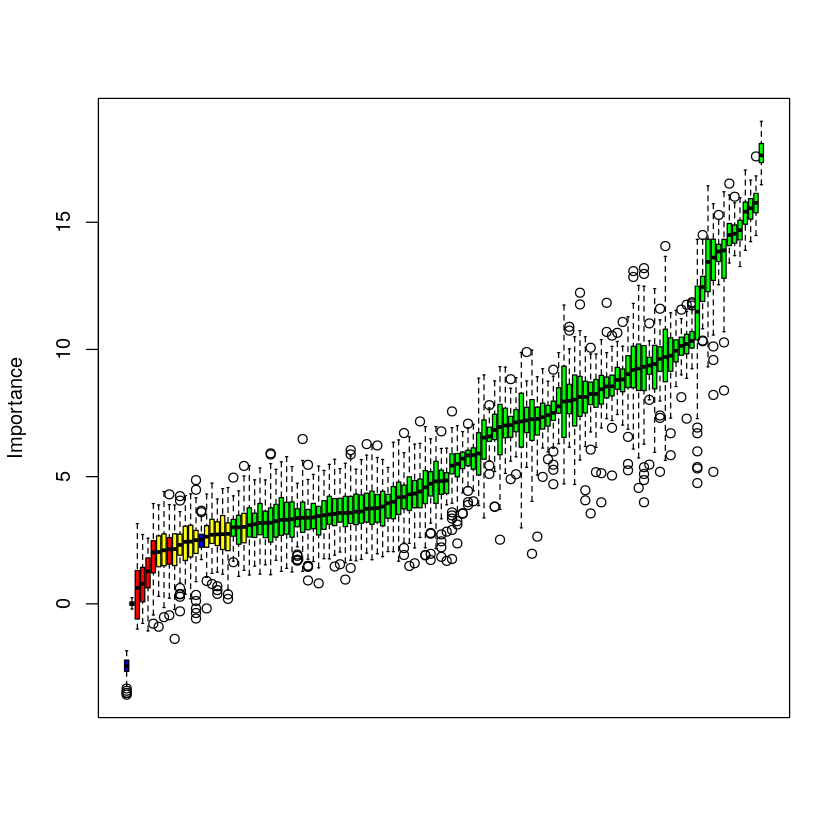

In [13]:
plot(boruta_output, xlab = "", xaxt = "n")
lz <- lapply(1:ncol(boruta_bank$ImpHistory), function(i) boruta_bank$ImpHistory[is.finite(boruta_bank$ImpHistory[,i]),i])
names(lz) <- colnames(boruta_bank$ImpHistory)
Labels <- sort(sapply(lz,median))   